In [158]:
import numpy as np
# np.bool = np.bool_
import pyarrow #.hdfs
import pyarrow.parquet as pq
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [159]:
# HDFS 클라이언트 설정
# hdfs_client = pyarrow.hdfs.connect('hdfs://hadoop-master:9000')

# HDFS에서 Parquet 파일 읽기
# parquet_file_path = './yellow_tripdata_2023-06.parquet'

# file_path = './'
# big_df = None
# df = None
# for file in os.listdir(file_path):
#     with open(parquet_file_path, 'rb') as f:
#         df= pq.read_table(f)
#         if big_df:
#             big_df += df
#         else:
#             big_dfe = df
    
    
# # DataFrame으로 변환
# df = table.to_pandas()

from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .master('spark://hadoop-master:7077') \
    .config("spark.driver.memory", "20g") \
    .appName('my-cool-app') \
    .getOrCreate()
df = spark.read.parquet('hdfs://hadoop-master:9000/user/root/data/yellow_tripdata_2023-06.parquet')
df.show(1, vertical=True)

df.toPandas()

# 데이터 확인
print(df.head())

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2023-06-01 00:08:48   2023-06-01 00:29:41              1.0   
1         1  2023-06-01 00:15:04   2023-06-01 00:25:18              0.0   
2         1  2023-06-01 00:48:24   2023-06-01 01:07:07              1.0   
3         2  2023-06-01 00:54:03   2023-06-01 01:17:29              3.0   
4         2  2023-06-01 00:18:44   2023-06-01 00:27:18              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.40         1.0                  N           140           238   
1           3.40         1.0                  N            50           151   
2          10.20         1.0                  N           138            97   
3           9.83         1.0                  N           100           244   
4           1.17         1.0                  N           137           234   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \


In [160]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-06-01 00:08:48,2023-06-01 00:29:41,1.0,3.40,1.0,N,140,238,1,21.90,3.50,0.5,6.70,0.00,1.0,33.60,2.5,0.00
1,1,2023-06-01 00:15:04,2023-06-01 00:25:18,0.0,3.40,1.0,N,50,151,1,15.60,3.50,0.5,3.00,0.00,1.0,23.60,2.5,0.00
2,1,2023-06-01 00:48:24,2023-06-01 01:07:07,1.0,10.20,1.0,N,138,97,1,40.80,7.75,0.5,10.00,0.00,1.0,60.05,0.0,1.75
3,2,2023-06-01 00:54:03,2023-06-01 01:17:29,3.0,9.83,1.0,N,100,244,1,39.40,1.00,0.5,8.88,0.00,1.0,53.28,2.5,0.00
4,2,2023-06-01 00:18:44,2023-06-01 00:27:18,1.0,1.17,1.0,N,137,234,1,9.30,1.00,0.5,0.72,0.00,1.0,15.02,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307229,2,2023-06-30 23:30:21,2023-07-01 00:00:46,NaN,9.20,NaN,None,42,148,0,38.53,0.00,0.5,8.51,0.00,1.0,51.04,NaN,NaN
3307230,1,2023-06-30 23:34:22,2023-07-01 00:32:59,NaN,20.20,NaN,None,132,74,0,70.00,1.75,0.5,11.97,6.55,1.0,91.77,NaN,NaN
3307231,2,2023-06-30 23:45:00,2023-07-01 00:10:00,NaN,6.16,NaN,None,256,140,0,28.03,0.00,0.5,6.41,0.00,1.0,38.44,NaN,NaN
3307232,2,2023-06-30 23:13:38,2023-06-30 23:51:19,NaN,11.65,NaN,None,91,246,0,45.74,0.00,0.5,0.00,6.55,1.0,56.29,NaN,NaN


In [161]:
# 데이터 정제


In [162]:
# 1.평균 여행 기간
df['mean_time_travel'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']

In [163]:
df['mean_time_travel'].mean()

Timedelta('0 days 00:17:42.563844892')

In [164]:
# 2.평균 여행 거리
df['trip_distance'].mean()

4.368790245867088

In [165]:
# 3.시간당 출발하는 여행 수를 기준으로 '피크 시간' 정의
# 하루동안 여행 분포 시각화 -> 값에 따라 강조
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df_hourly_counts = df.groupby(pd.Grouper(key='tpep_pickup_datetime', freq='H')).size()

In [166]:
# 'timestamp' 열을 인덱스로 설정
df.set_index('tpep_pickup_datetime', inplace=True)

# 시간 단위로 리샘플링하여 레코드 수 세기
df_hourly_counts = df.resample('H').size()
print(df_hourly_counts)

tpep_pickup_datetime
2002-12-31 23:00:00       3
2003-01-01 00:00:00       1
2003-01-01 01:00:00       0
2003-01-01 02:00:00       0
2003-01-01 03:00:00       0
                       ... 
2023-06-30 20:00:00    4494
2023-06-30 21:00:00    4760
2023-06-30 22:00:00    4909
2023-06-30 23:00:00    4577
2023-07-01 00:00:00      16
Freq: H, Length: 179666, dtype: int64


In [167]:
specific_day='2023-06-30'
s_specific_day = df_hourly_counts[df_hourly_counts.index.date == pd.to_datetime(specific_day).date()]

In [168]:
s_specific_day

tpep_pickup_datetime
2023-06-30 00:00:00    3258
2023-06-30 01:00:00    2026
2023-06-30 02:00:00    1226
2023-06-30 03:00:00     780
2023-06-30 04:00:00     685
2023-06-30 05:00:00     745
2023-06-30 06:00:00    1647
2023-06-30 07:00:00    2566
2023-06-30 08:00:00    3428
2023-06-30 09:00:00    4043
2023-06-30 10:00:00    4479
2023-06-30 11:00:00    4773
2023-06-30 12:00:00    5239
2023-06-30 13:00:00    5540
2023-06-30 14:00:00    6083
2023-06-30 15:00:00    6222
2023-06-30 16:00:00    5935
2023-06-30 17:00:00    6177
2023-06-30 18:00:00    6134
2023-06-30 19:00:00    5494
2023-06-30 20:00:00    4494
2023-06-30 21:00:00    4760
2023-06-30 22:00:00    4909
2023-06-30 23:00:00    4577
Freq: H, dtype: int64

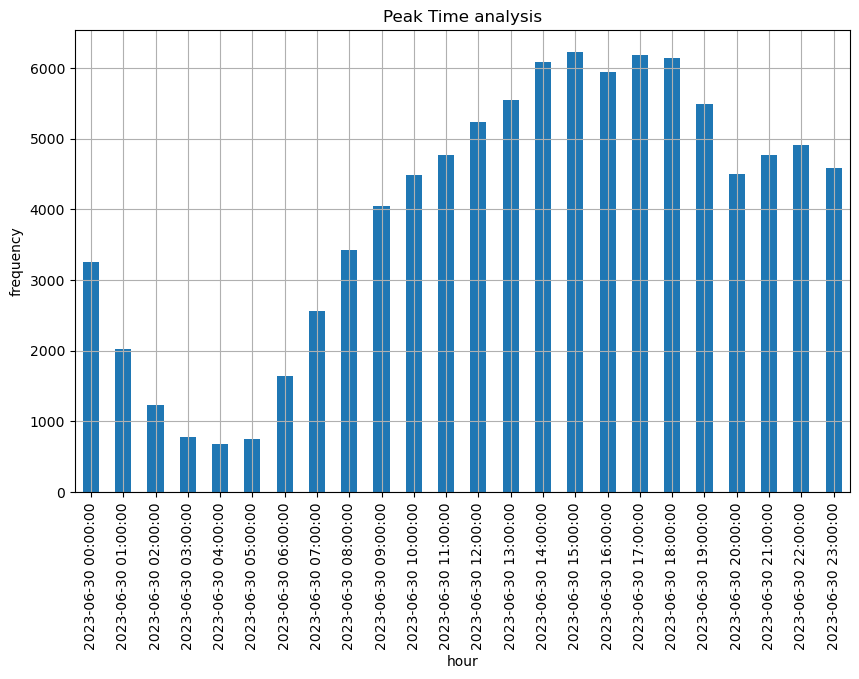

In [169]:
# 결과 시각화
plt.figure(figsize=(10, 6))
s_specific_day.plot(kind='bar')
plt.title('Peak Time analysis')
plt.xlabel('hour')
plt.ylabel('frequency')
plt.grid(True)
plt.show()

In [170]:
# 4.여행 + 날씨(기온, 강수량 등)
weather = pd.read_csv('jan_2024_weather_data.csv')
weather['Datetime'] = pd.to_datetime(weather['Datetime'])
weather['Datetime'] = weather['Datetime'] - pd.DateOffset(years=1)
weather

,Datetime,Temperature,Humidity,Wind Speed,Pressure,Condition
0,2023-01-01 00:51:00,2.22,64%,8mph,30.06,Fair
1,2023-01-01 00:52:00,2.22,64%,8mph,30.06,Fair
2,2023-01-01 00:53:00,2.22,64%,8mph,30.06,Fair
3,2023-01-01 00:54:00,2.22,64%,8mph,30.06,Fair
4,2023-01-01 00:55:00,2.22,64%,8mph,30.06,Fair
...,...,...,...,...,...,...
218824,2023-05-31 23:55:00,6.11,53%,7mph,29.98,Cloudy
218825,2023-05-31 23:56:00,6.11,53%,7mph,29.98,Cloudy
218826,2023-05-31 23:57:00,6.11,53%,7mph,29.98,Cloudy
218827,2023-05-31 23:58:00,6.11,53%,7mph,29.98,Cloudy


In [171]:
# 날짜만 추출하여 'date' 열 생성
weather['date'] = weather['Datetime'].dt.date

# 하루의 대표 Condition 계산
representative_condition = weather.groupby('date')['Condition'].agg(lambda x: x.mode()[0])

# 하루의 평균 Temperature 계산
average_temperature = weather.groupby('date')['Temperature'].mean()

# 결과를 하나의 DataFrame으로 결합
result_df = pd.DataFrame({
    'Condition': representative_condition,
    'Average Temperature': average_temperature
})

print(result_df)

                Condition  Average Temperature
date                                          
2023-01-01  Mostly Cloudy             5.787826
2023-01-02           Fair             2.693188
2023-01-03  Mostly Cloudy             3.980833
2023-01-04         Cloudy             3.922396
2023-01-05           Fair             0.457792
...                   ...                  ...
2023-05-27         Cloudy             6.110000
2023-05-28         Cloudy             6.110000
2023-05-29         Cloudy             6.110000
2023-05-30         Cloudy             6.110000
2023-05-31         Cloudy             6.108840

[151 rows x 2 columns]


In [172]:
# 2023-01-01부터 2023-05-31까지의 데이터만 필터링
filtered_df = df_hourly_counts['2023-01-01':'2023-05-31']
filtered_df

tpep_pickup_datetime
2023-01-01 00:00:00     0
2023-01-01 01:00:00     0
2023-01-01 02:00:00     0
2023-01-01 03:00:00     0
2023-01-01 04:00:00     0
                       ..
2023-05-31 19:00:00     0
2023-05-31 20:00:00     1
2023-05-31 21:00:00     0
2023-05-31 22:00:00     0
2023-05-31 23:00:00    18
Freq: H, Length: 3624, dtype: int64

In [173]:
date_counts = filtered_df.groupby(filtered_df.index.date).size()
date_counts.name = 'count'
# 날짜를 인덱스에서 열로 변환
date_counts = date_counts.reset_index()
# 열 이름 변경 (인덱스에서 변환된 열의 이름이 'index'이므로 이를 'date'로 변경)
date_counts.rename(columns={'index': 'date'}, inplace=True)
date_counts

,date,count
0,2023-01-01,24
1,2023-01-02,24
2,2023-01-03,24
3,2023-01-04,24
4,2023-01-05,24
...,...,...
146,2023-05-27,24
147,2023-05-28,24
148,2023-05-29,24
149,2023-05-30,24


In [174]:
# 병합 수행
merged_df = pd.merge(date_counts, weather, left_on='date', right_on='date', how='outer')

print(merged_df)

              date  count            Datetime  Temperature Humidity  \
0       2023-01-01     24 2023-01-01 00:51:00         2.22      64%   
1       2023-01-01     24 2023-01-01 00:52:00         2.22      64%   
2       2023-01-01     24 2023-01-01 00:53:00         2.22      64%   
3       2023-01-01     24 2023-01-01 00:54:00         2.22      64%   
4       2023-01-01     24 2023-01-01 00:55:00         2.22      64%   
...            ...    ...                 ...          ...      ...   
218824  2023-05-31     24 2023-05-31 23:55:00         6.11      53%   
218825  2023-05-31     24 2023-05-31 23:56:00         6.11      53%   
218826  2023-05-31     24 2023-05-31 23:57:00         6.11      53%   
218827  2023-05-31     24 2023-05-31 23:58:00         6.11      53%   
218828  2023-05-31     24 2023-05-31 23:59:00         4.44      68%   

       Wind Speed  Pressure Condition  
0            8mph     30.06      Fair  
1            8mph     30.06      Fair  
2            8mph     30.06

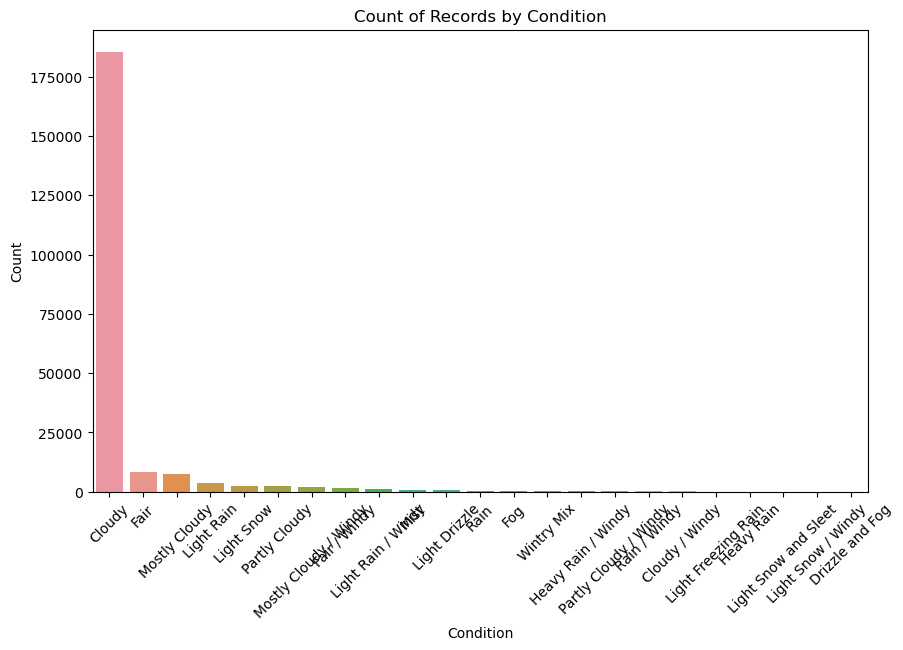

In [175]:
# Condition별 레코드 수 계산
condition_counts = merged_df['Condition'].value_counts()

# Condition별 레코드 수 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=condition_counts.index, y=condition_counts.values)
plt.title('Count of Records by Condition')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


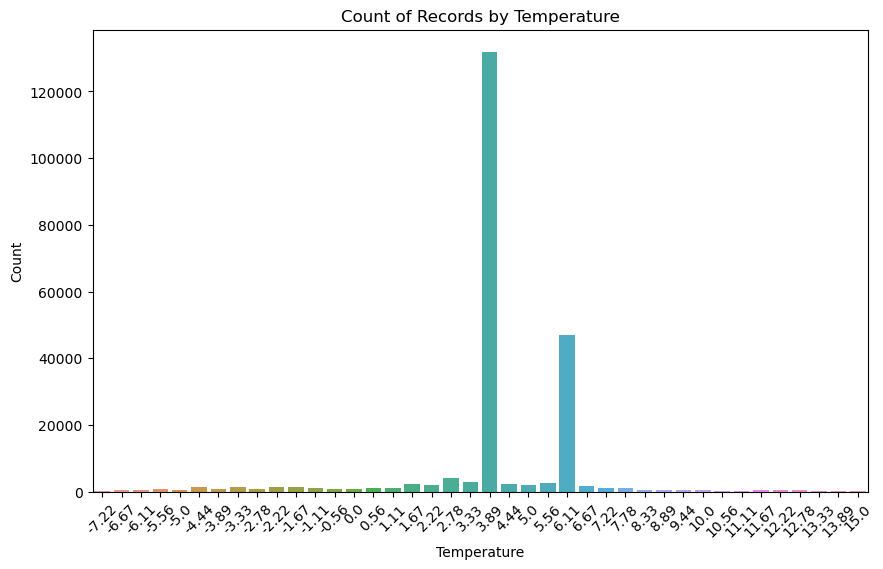

In [176]:
# Temperature별 레코드 수 계산
# Temperature는 문자열이므로, 필요시 숫자로 변환
merged_df['Temperature'] = merged_df['Temperature'].astype(float)
temperature_counts = merged_df['Temperature'].value_counts().sort_index()

# Temperature별 레코드 수 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=temperature_counts.index, y=temperature_counts.values)
plt.title('Count of Records by Temperature')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


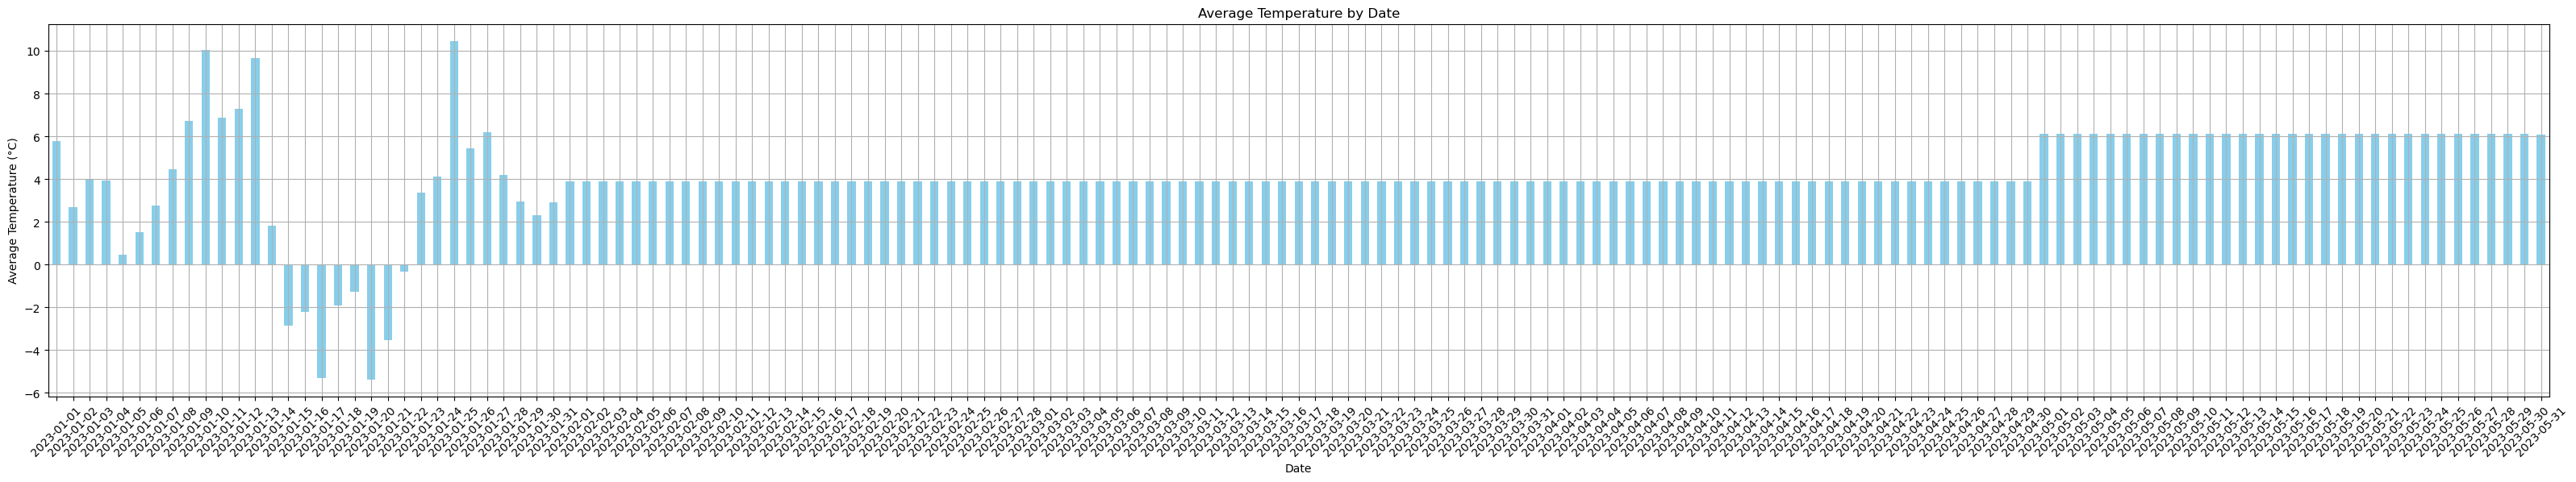

In [177]:
# 날짜별 평균 기온 시각화
plt.figure(figsize=(40, 6))
result_df['Average Temperature'].plot(kind='bar', color='skyblue')
plt.title('Average Temperature by Date')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [181]:
from pyspark.sql import SparkSession

# Spark 세션 생성
spark = SparkSession.builder.appName("DataFrame to HDFS").getOrCreate()

# Pandas DataFrame을 Spark DataFrame으로 변환
spark_df = spark.createDataFrame(merged_df)

# Parquet 형식으로 HDFS에 저장
hdfs_path = 'hdfs://hadoop-master:9000/user/root/output/result.parquet'
spark_df.write.parquet(hdfs_path)

print(f'Spark DataFrame successfully saved to HDFS at {hdfs_path}')

ModuleNotFoundError: No module named 'pyspark'